In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats

df = pd.read_csv(r"C:\Users\HP\Desktop\2025 SPRING\DSCI 5240\PROJECT STATUS REPORT\DSCI 5240 Project Data.csv")
print(df.head())

  Water Pump ID Water Source Type Water Quality  Distance to Nearest Town  \
0         WP001              Well         Clean                      44.0   
1         WP002              Lake         Clean                      13.0   
2         WP003              Lake         Clean                      27.0   
3         WP004              Well         Clean                      14.0   
4         WP005              Lake         Clean                      41.0   

   Population Served  Installation Year      Funder Payment Type  \
0            13000.0             2006.0  World Bank         Free   
1            13000.0             1990.0   Red Cross         Free   
2            12000.0             1997.0       Oxfam  Pay per use   
3             9000.0             1992.0       Oxfam  Pay per use   
4            16000.0             2006.0         NaN  Pay per use   

   Water Pump Age       Pump Type                            GPS Coordinates  \
0            18.0  Motorized Pump  (-20.59946306

In [160]:
# Get the total number of rows
total_rows = df.shape[0]

# Get the total number of columns
total_columns = df.shape[1]

# Calculate total datapoints (rows * columns)
total_datapoints = total_rows * total_columns

print("Total number of rows:", total_rows)
print("Total number of datapoints:", total_datapoints)


Total number of rows: 5000
Total number of datapoints: 60000


In [161]:
print(df.describe())  # Basic statistics

       Distance to Nearest Town  Population Served  Installation Year  \
count               4750.000000        4750.000000        4750.000000   
mean                  33.605684       13020.210526        2005.122947   
std                   14.203737        2974.803284           8.893727   
min                   -3.000000        2000.000000        1990.000000   
25%                   21.000000       11000.000000        1997.000000   
50%                   35.000000       13000.000000        2005.000000   
75%                   44.000000       15000.000000        2013.000000   
max                   76.000000       22000.000000        2020.000000   

       Water Pump Age  
count     4750.000000  
mean        18.921895  
std          8.881974  
min          4.000000  
25%         11.000000  
50%         19.000000  
75%         27.000000  
max         34.000000  


In [162]:
# Check data types of each column
for column in df.columns:
    if df[column].dtype == 'object':
        if df[column].str.isnumeric().all():
            print(f"{column}: Numeric (text format)")
        else:
            print(f"{column}: Text (mixed or pure)")
    else:
        print(f"{column}: Numeric (actual number format)")

Water Pump ID: Text (mixed or pure)
Water Source Type: Text (mixed or pure)
Water Quality: Text (mixed or pure)
Distance to Nearest Town: Numeric (actual number format)
Population Served: Numeric (actual number format)
Installation Year: Numeric (actual number format)
Funder: Text (mixed or pure)
Payment Type: Text (mixed or pure)
Water Pump Age: Numeric (actual number format)
Pump Type: Text (mixed or pure)
GPS Coordinates: Text (mixed or pure)
Functioning Status: Text (mixed or pure)


In [163]:
print(df.nunique())  # Shows number of unique values in each column

Water Pump ID               4750
Water Source Type              4
Water Quality                  2
Distance to Nearest Town      76
Population Served             21
Installation Year             31
Funder                         5
Payment Type                   2
Water Pump Age                31
Pump Type                      3
GPS Coordinates             4750
Functioning Status             2
dtype: int64


In [164]:
print(df.duplicated().sum())  # Count duplicate rows

0


In [165]:
# Count the number of rows with missing values in any column
missing_rows = df.isnull().any(axis=1).sum()
print(f"Number of rows with at least one missing value: {missing_rows}")

Number of rows with at least one missing value: 2278


In [166]:
print(df.isnull().sum())  # count of missing values in each column

Water Pump ID               250
Water Source Type           250
Water Quality               250
Distance to Nearest Town    250
Population Served           250
Installation Year           250
Funder                      250
Payment Type                250
Water Pump Age              250
Pump Type                   250
GPS Coordinates             250
Functioning Status          250
dtype: int64


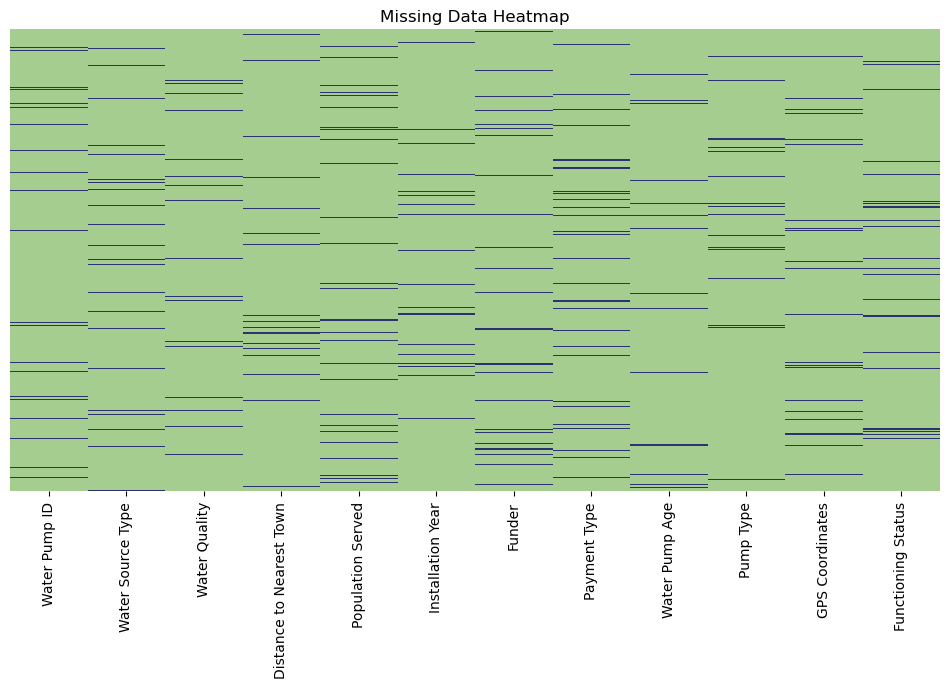

In [167]:
# Visualization of missing values: 1. Heatmap with custom colors
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cmap='crest', cbar=False, yticklabels=False)

plt.title("Missing Data Heatmap")
plt.show()


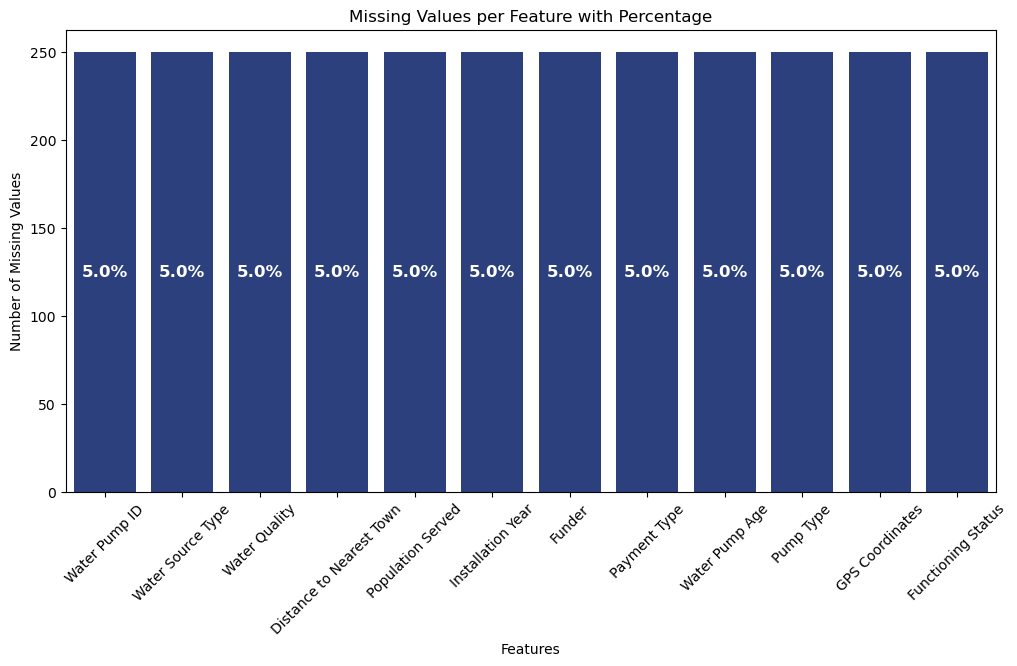

In [168]:
2. #Bar Plot of Missing Values Count & Percentage
missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=missing_counts.index, y=missing_counts.values, color="#1E3A8A")  # Dark Blue

# Add percentage labels INSIDE the bars
for i, (count, percent) in enumerate(zip(missing_counts.values, missing_percent)):
    plt.text(i, count / 2, f"{percent:.1f}%", ha='center', va='center', 
             fontsize=12, color='white', fontweight='bold')

plt.xlabel("Features")
plt.ylabel("Number of Missing Values")
plt.title("Missing Values per Feature with Percentage")
plt.xticks(rotation=45)
plt.show()


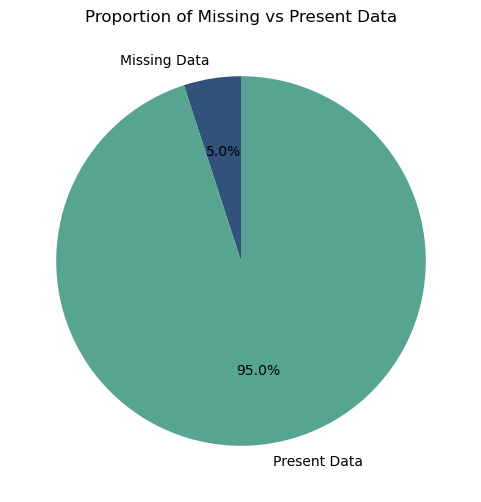

In [169]:
# 3. Pie Chart for Missing vs Present Data
missing_total = df.isnull().sum().sum()
missing_present = df.size - missing_total

# Define custom colors
present_color = sns.color_palette("crest", as_cmap=True)(0.3)  
missing_color = "#32527B"  

plt.figure(figsize=(6, 6))
plt.pie([missing_total, missing_present], labels=["Missing Data", "Present Data"],
        autopct='%1.1f%%', colors=[missing_color, present_color], startangle=90)

plt.title("Proportion of Missing vs Present Data")
plt.show()


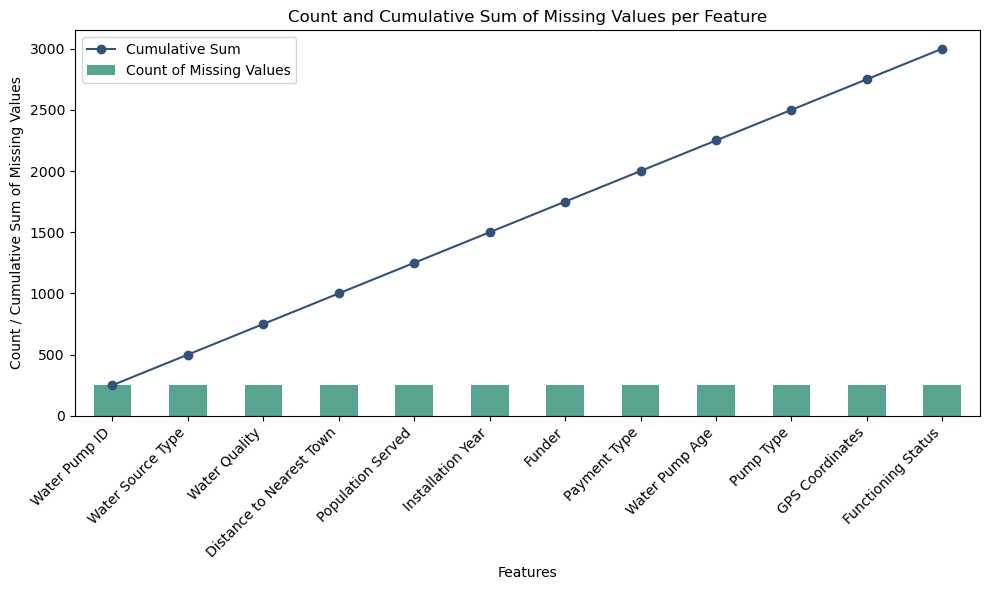

In [170]:
# 4. Count & Cumulative Sum of Missing Values

plt.figure(figsize=(10, 6))

# Define custom colors
bar_color = sns.color_palette("crest", as_cmap=True)(0.3)  # Lighter Crest for bars
line_color = "#32527B"  # Dark Blue for Cumulative Sum Line

# Plot the count of missing values for each column
missing_counts.plot(kind='bar', color=bar_color, label='Count of Missing Values')

# Calculate and plot the cumulative sum of missing values
cumulative_sum = np.cumsum(missing_counts)
plt.plot(missing_counts.index, cumulative_sum, color=line_color, linestyle='-', marker='o', label='Cumulative Sum')

# Adding labels and title
plt.xlabel('Features')
plt.ylabel('Count / Cumulative Sum of Missing Values')
plt.title('Count and Cumulative Sum of Missing Values per Feature')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


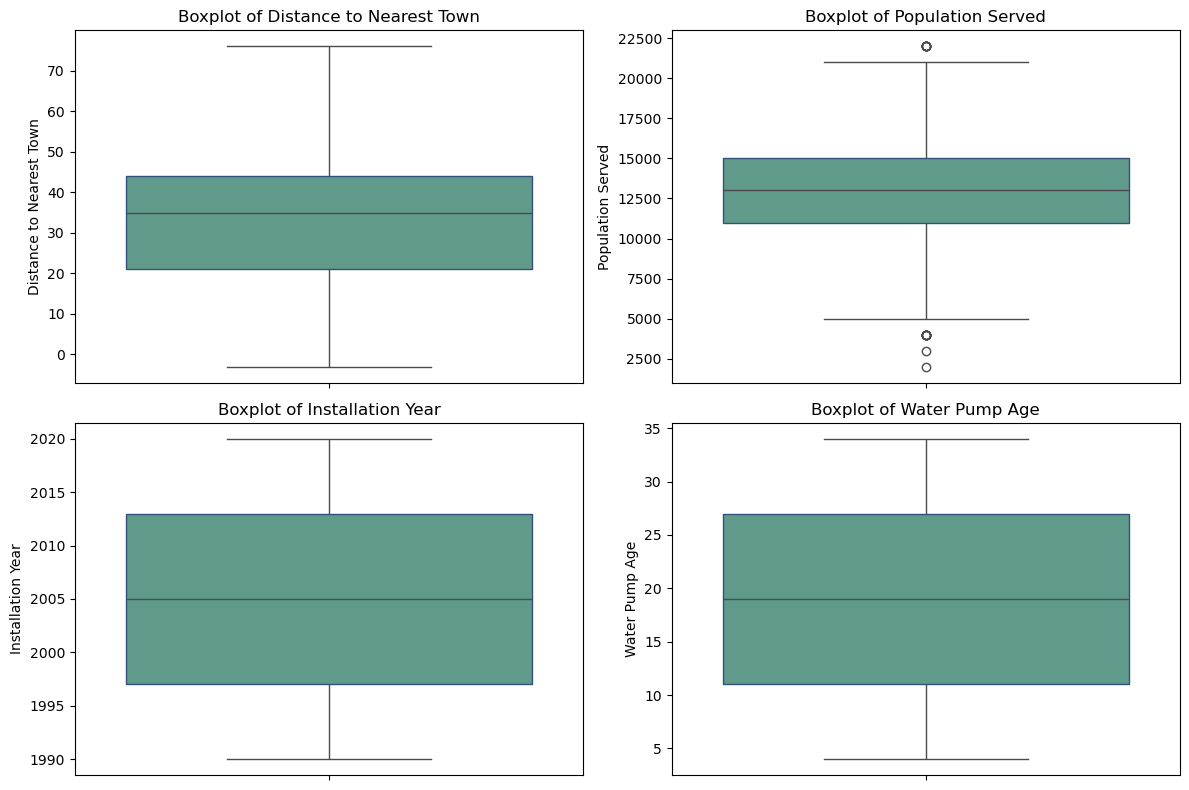

In [171]:
#Identification of Outliers
#Boxplots for Visualizing Outliers

# Define custom colors
bar_color = sns.color_palette("crest", as_cmap=True)(0.3)  # Lighter Crest for bars
edge_color = "#32527B"  # Dark Blue for the edges of the bars

# Identification of Outliers - Boxplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Boxplots with custom colors
sns.boxplot(y=df['Distance to Nearest Town'], ax=axes[0, 0], color=bar_color, boxprops=dict(edgecolor=edge_color))
axes[0, 0].set_title('Boxplot of Distance to Nearest Town')

sns.boxplot(y=df['Population Served'], ax=axes[0, 1], color=bar_color, boxprops=dict(edgecolor=edge_color))
axes[0, 1].set_title('Boxplot of Population Served')

sns.boxplot(y=df['Installation Year'], ax=axes[1, 0], color=bar_color, boxprops=dict(edgecolor=edge_color))
axes[1, 0].set_title('Boxplot of Installation Year')

sns.boxplot(y=df['Water Pump Age'], ax=axes[1, 1], color=bar_color, boxprops=dict(edgecolor=edge_color))
axes[1, 1].set_title('Boxplot of Water Pump Age')

plt.tight_layout()
plt.show()


In [172]:
# Z-Score Method
def z_score_outliers(df, column_name):
    # Calculate Z-scores for the given column
    z_scores = stats.zscore(df[column_name])
    # Identify outliers (Z-score > 3 or < -3)
    outliers_zscore = df[np.abs(z_scores) > 3]
    return outliers_zscore

# IQR Method
def iqr_outliers(df, column_name):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers (values outside the lower and upper bounds)
    outliers_iqr = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    return outliers_iqr

# Apply the outlier detection methods to specific columns
# For example: 'Distance to Nearest Town', 'Population Served', etc.

# Using Z-Score method
outliers_zscore_distance = z_score_outliers(df, 'Distance to Nearest Town')
outliers_zscore_population = z_score_outliers(df, 'Population Served')

# Using IQR method
outliers_iqr_distance = iqr_outliers(df, 'Distance to Nearest Town')
outliers_iqr_population = iqr_outliers(df, 'Population Served')

# Print outliers
print(f"Outliers based on Z-Score for Distance to Nearest Town:\n{outliers_zscore_distance}")
print(f"Outliers based on Z-Score for Population Served:\n{outliers_zscore_population}")

print(f"Outliers based on IQR for Distance to Nearest Town:\n{outliers_iqr_distance}")
print(f"Outliers based on IQR for Population Served:\n{outliers_iqr_population}")

Outliers based on Z-Score for Distance to Nearest Town:
Empty DataFrame
Columns: [Water Pump ID, Water Source Type, Water Quality, Distance to Nearest Town, Population Served, Installation Year, Funder, Payment Type, Water Pump Age, Pump Type, GPS Coordinates, Functioning Status]
Index: []
Outliers based on Z-Score for Population Served:
Empty DataFrame
Columns: [Water Pump ID, Water Source Type, Water Quality, Distance to Nearest Town, Population Served, Installation Year, Funder, Payment Type, Water Pump Age, Pump Type, GPS Coordinates, Functioning Status]
Index: []
Outliers based on IQR for Distance to Nearest Town:
Empty DataFrame
Columns: [Water Pump ID, Water Source Type, Water Quality, Distance to Nearest Town, Population Served, Installation Year, Funder, Payment Type, Water Pump Age, Pump Type, GPS Coordinates, Functioning Status]
Index: []
Outliers based on IQR for Population Served:
     Water Pump ID Water Source Type Water Quality  Distance to Nearest Town  \
351          

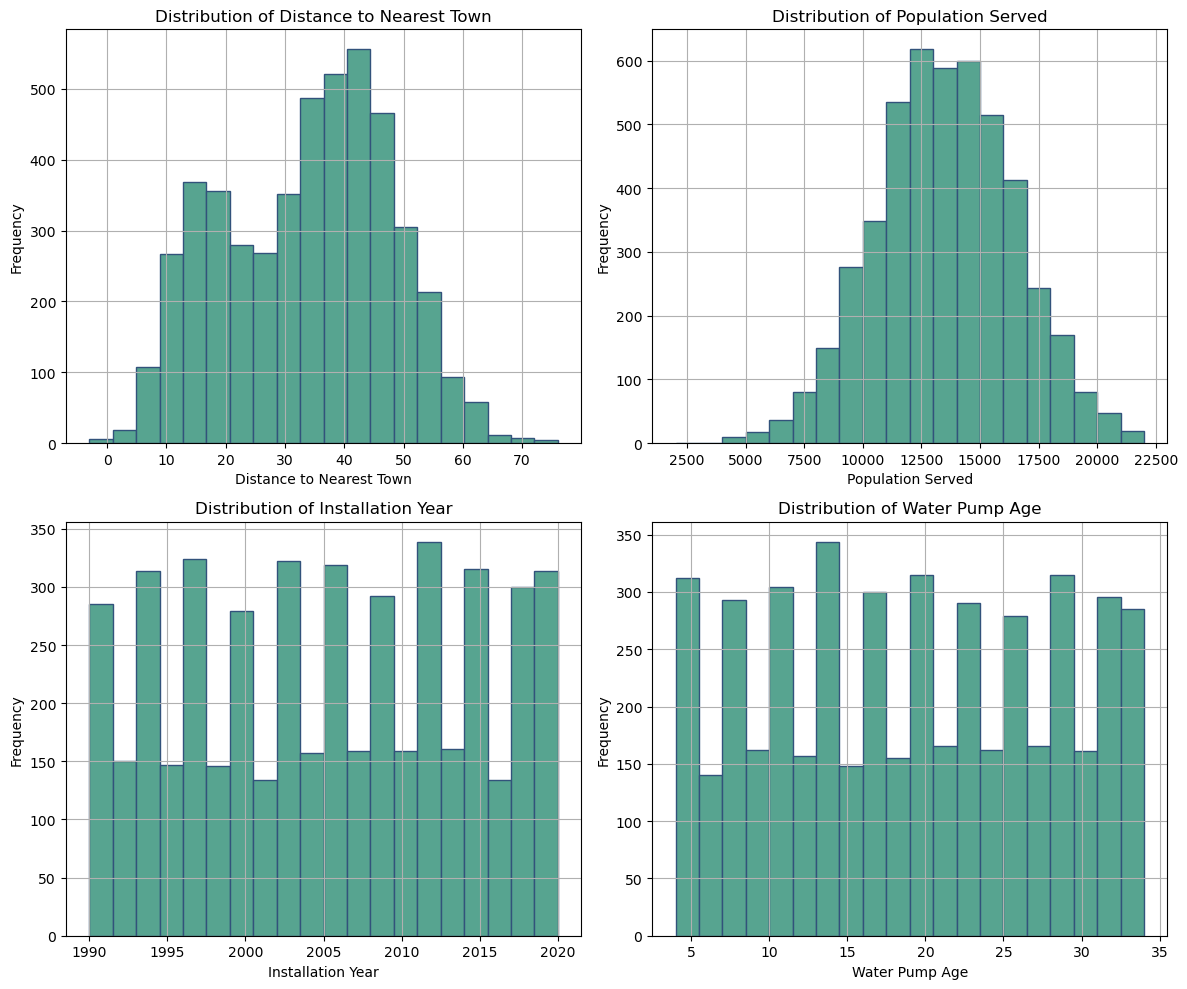

In [173]:
# List of numerical columns to visualize
columns_to_plot = ['Distance to Nearest Town', 'Population Served', 'Installation Year', 'Water Pump Age']

# Create a 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 rows, 2 columns

# Define custom colors
bar_color = sns.color_palette("crest", as_cmap=True)(0.3)  # Lighter Crest for bars
edge_color = "#32527B"  # Dark Blue for the edges of the bars

# Flatten the axes array to easily iterate
axes = axes.flatten()

# Loop through the columns and plot the histograms in subplots
for i, column in enumerate(columns_to_plot):
    df[column].hist(bins=20, color=bar_color, edgecolor=edge_color, ax=axes[i])  # Assign to subplot
    
    # Add title and labels
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [174]:
# Taking imputation action based on distribution
# Features with normal distribution 
# Fill missing values with mean and replace negative values with mean for specified columns

# Fill missing values with mean and replace negative values with mean for 'Distance to Nearest Town'
mean_distance = df['Distance to Nearest Town'].mean()
df['Distance to Nearest Town'] = df['Distance to Nearest Town'].apply(lambda x: mean_distance if x < 0 or pd.isna(x) else x)

# Fill missing values with mean for 'Population Served'
df['Population Served'] = df['Population Served'].fillna(df['Population Served'].mean())


In [175]:
# Taking imputation action based on distribution
# Features without normal distribution 
# Fill missing values with mode for specified columns
mode_value = df['Installation Year'].mode()[0]  # Get the mode (most frequent value)
df['Installation Year'] = df['Installation Year'].fillna(mode_value)
mode_value = df['Water Pump Age'].mode()[0]  # Get the mode (most frequent value)
df['Water Pump Age'] = df['Water Pump Age'].fillna(mode_value)

In [176]:
# Chceking missing values again after application of imputation technique
missing_values_df = pd.DataFrame({'Feature': df.columns, 'Missing Values': df.isnull().sum().values})
print(missing_values_df)

                     Feature  Missing Values
0              Water Pump ID             250
1          Water Source Type             250
2              Water Quality             250
3   Distance to Nearest Town               0
4          Population Served               0
5          Installation Year               0
6                     Funder             250
7               Payment Type             250
8             Water Pump Age               0
9                  Pump Type             250
10           GPS Coordinates             250
11        Functioning Status             250


In [177]:
# Checking the count of number of rows with missing values in any column, after applying imputation techniques on numerical/float data type features
missing_rows = df.isnull().any(axis=1).sum()
print(f"Number of rows with at least one missing value: {missing_rows}")

Number of rows with at least one missing value: 1667


In [178]:
# Checking summary statistics after filling negative values found in "Distance to Nearest Town" with mean.
print(df.describe())  # Basic statistics

       Distance to Nearest Town  Population Served  Installation Year  \
count               5000.000000        5000.000000        5000.000000   
mean                  33.613005       13020.210526        2005.416800   
std                   13.834331        2899.464319           8.762627   
min                    0.000000        2000.000000        1990.000000   
25%                   22.000000       11000.000000        1998.000000   
50%                   34.000000       13000.000000        2006.000000   
75%                   44.000000       15000.000000        2012.000000   
max                   76.000000       22000.000000        2020.000000   

       Water Pump Age  
count     5000.000000  
mean        18.625800  
std          8.752731  
min          4.000000  
25%         12.000000  
50%         18.000000  
75%         26.000000  
max         34.000000  


In [179]:
# Exploring Imputation techniques for features with data type Object
# List of categorical features (defined before usage)
categorical_features = ["Water Source Type", "Water Quality", "Funder", "Pump Type", "Functioning Status", "Payment Type"]

# Finding Proportion of each unique value in categorical features (unique values up to 5 only)
proportions_before = {col: df[col].value_counts(normalize=True, dropna=True) for col in categorical_features}

# Calculate and print proportions of unique values (excluding missing values)
for column in categorical_features:
    print(f"Column: {column}")
    proportions = df[column].value_counts(normalize=True, dropna=True)
    print(proportions)
    print("-" * 30)


Column: Water Source Type
Water Source Type
Lake        0.500421
Well        0.345474
River       0.121684
Borehole    0.032421
Name: proportion, dtype: float64
------------------------------
Column: Water Quality
Water Quality
Clean           0.890947
Contaminated    0.109053
Name: proportion, dtype: float64
------------------------------
Column: Funder
Funder
Red Cross     0.361895
Oxfam         0.298316
USAID         0.148421
UNICEF        0.112421
World Bank    0.078947
Name: proportion, dtype: float64
------------------------------
Column: Pump Type
Pump Type
Hand Pump         0.520000
Motorized Pump    0.385684
Solar Pump        0.094316
Name: proportion, dtype: float64
------------------------------
Column: Functioning Status
Functioning Status
Not Functioning    0.588
Functioning        0.412
Name: proportion, dtype: float64
------------------------------
Column: Payment Type
Payment Type
Pay per use    0.750947
Free           0.249053
Name: proportion, dtype: float64
---------

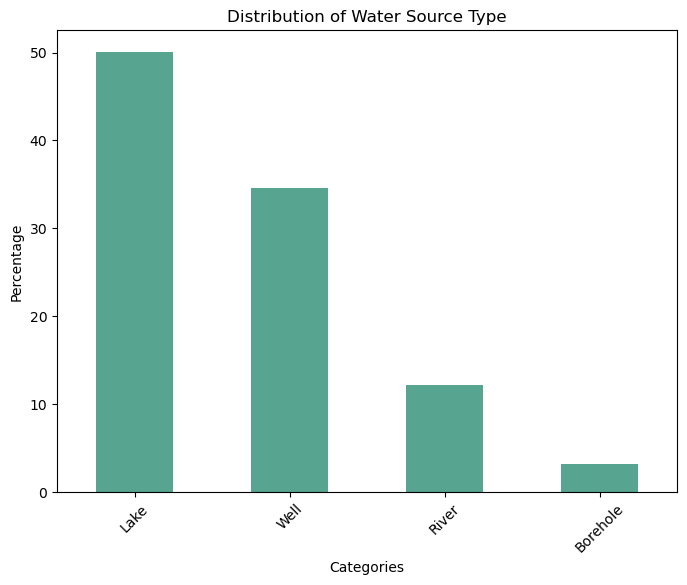

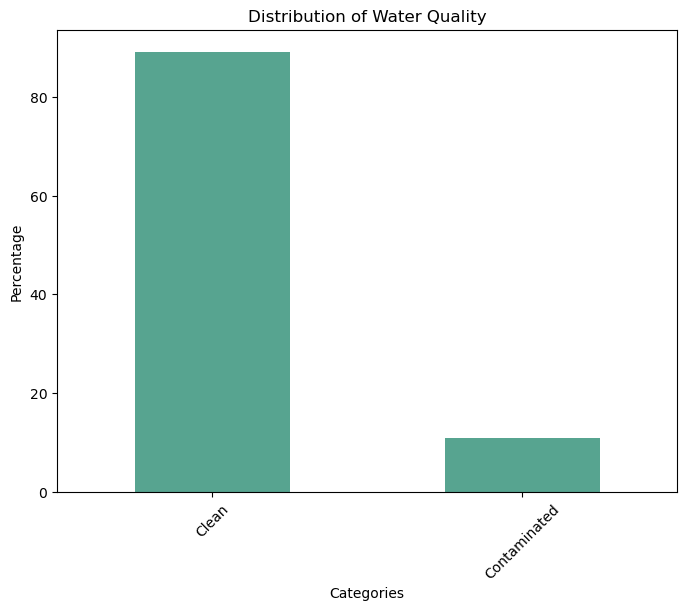

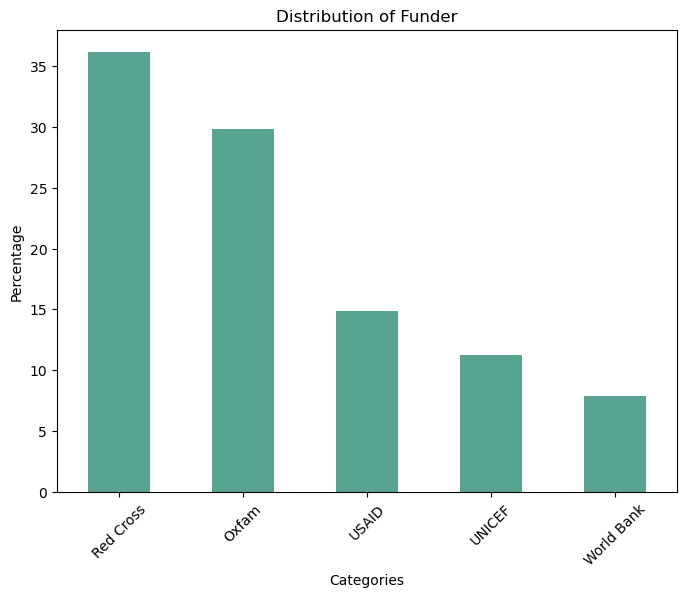

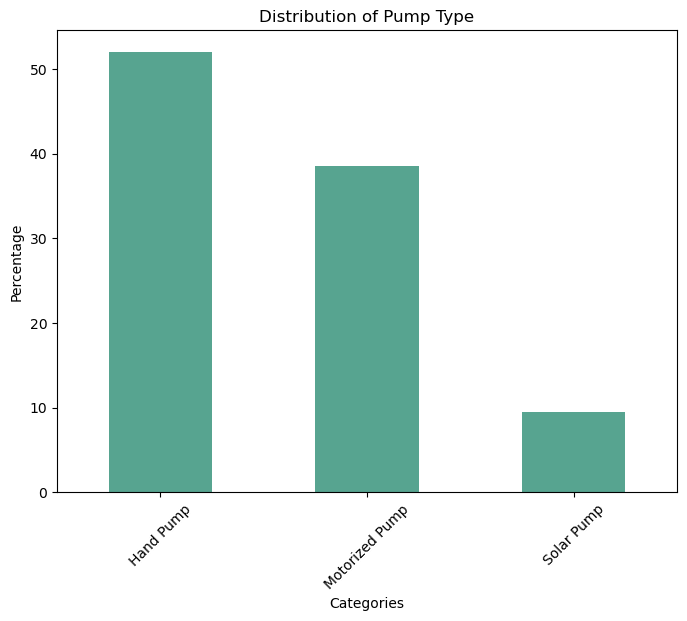

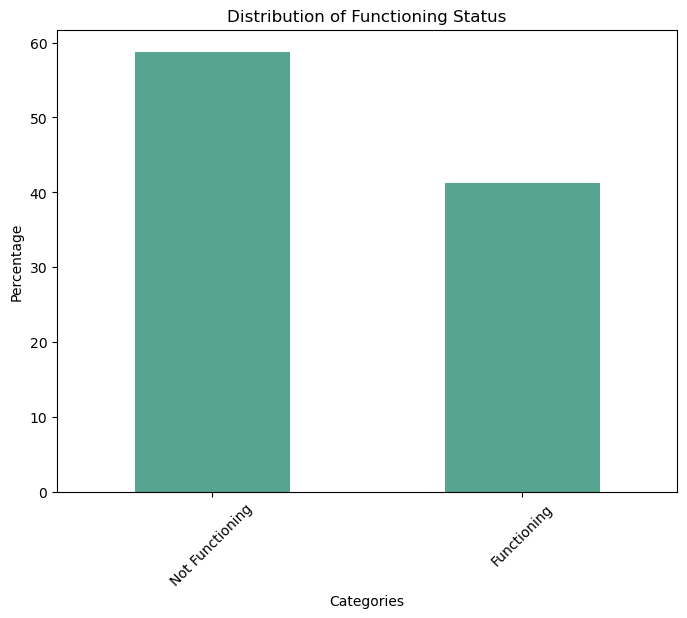

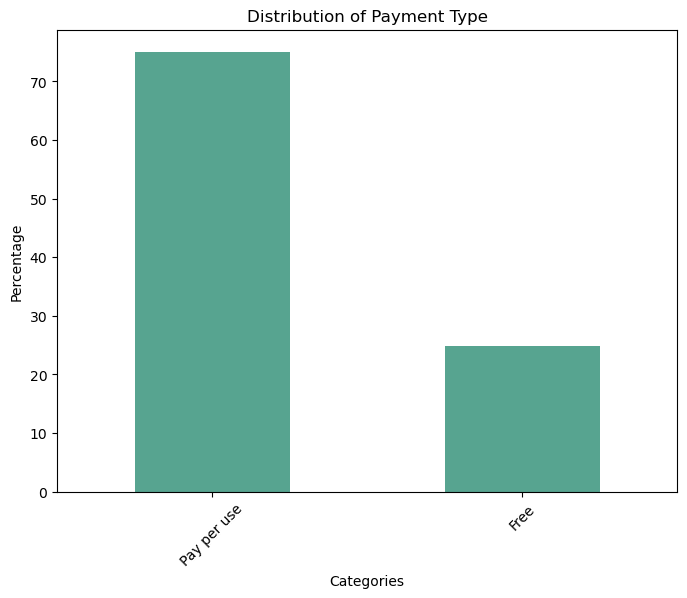

In [180]:
# Visualize proportions as bar charts
for column in categorical_features:
    plt.figure(figsize=(8, 6))  # Set figure size
    proportions = df[column].value_counts(normalize=True, dropna=True) * 100  # Calculate proportions
    proportions.plot(kind='bar', color=sns.color_palette("crest", as_cmap=True)(0.3))  # Using crest color palette for bars
    plt.title(f'Distribution of {column}')  # Set the title
    plt.xlabel('Categories')  # Set x-axis label
    plt.ylabel('Percentage')  # Set y-axis label
    plt.xticks(rotation=45)
    plt.show()


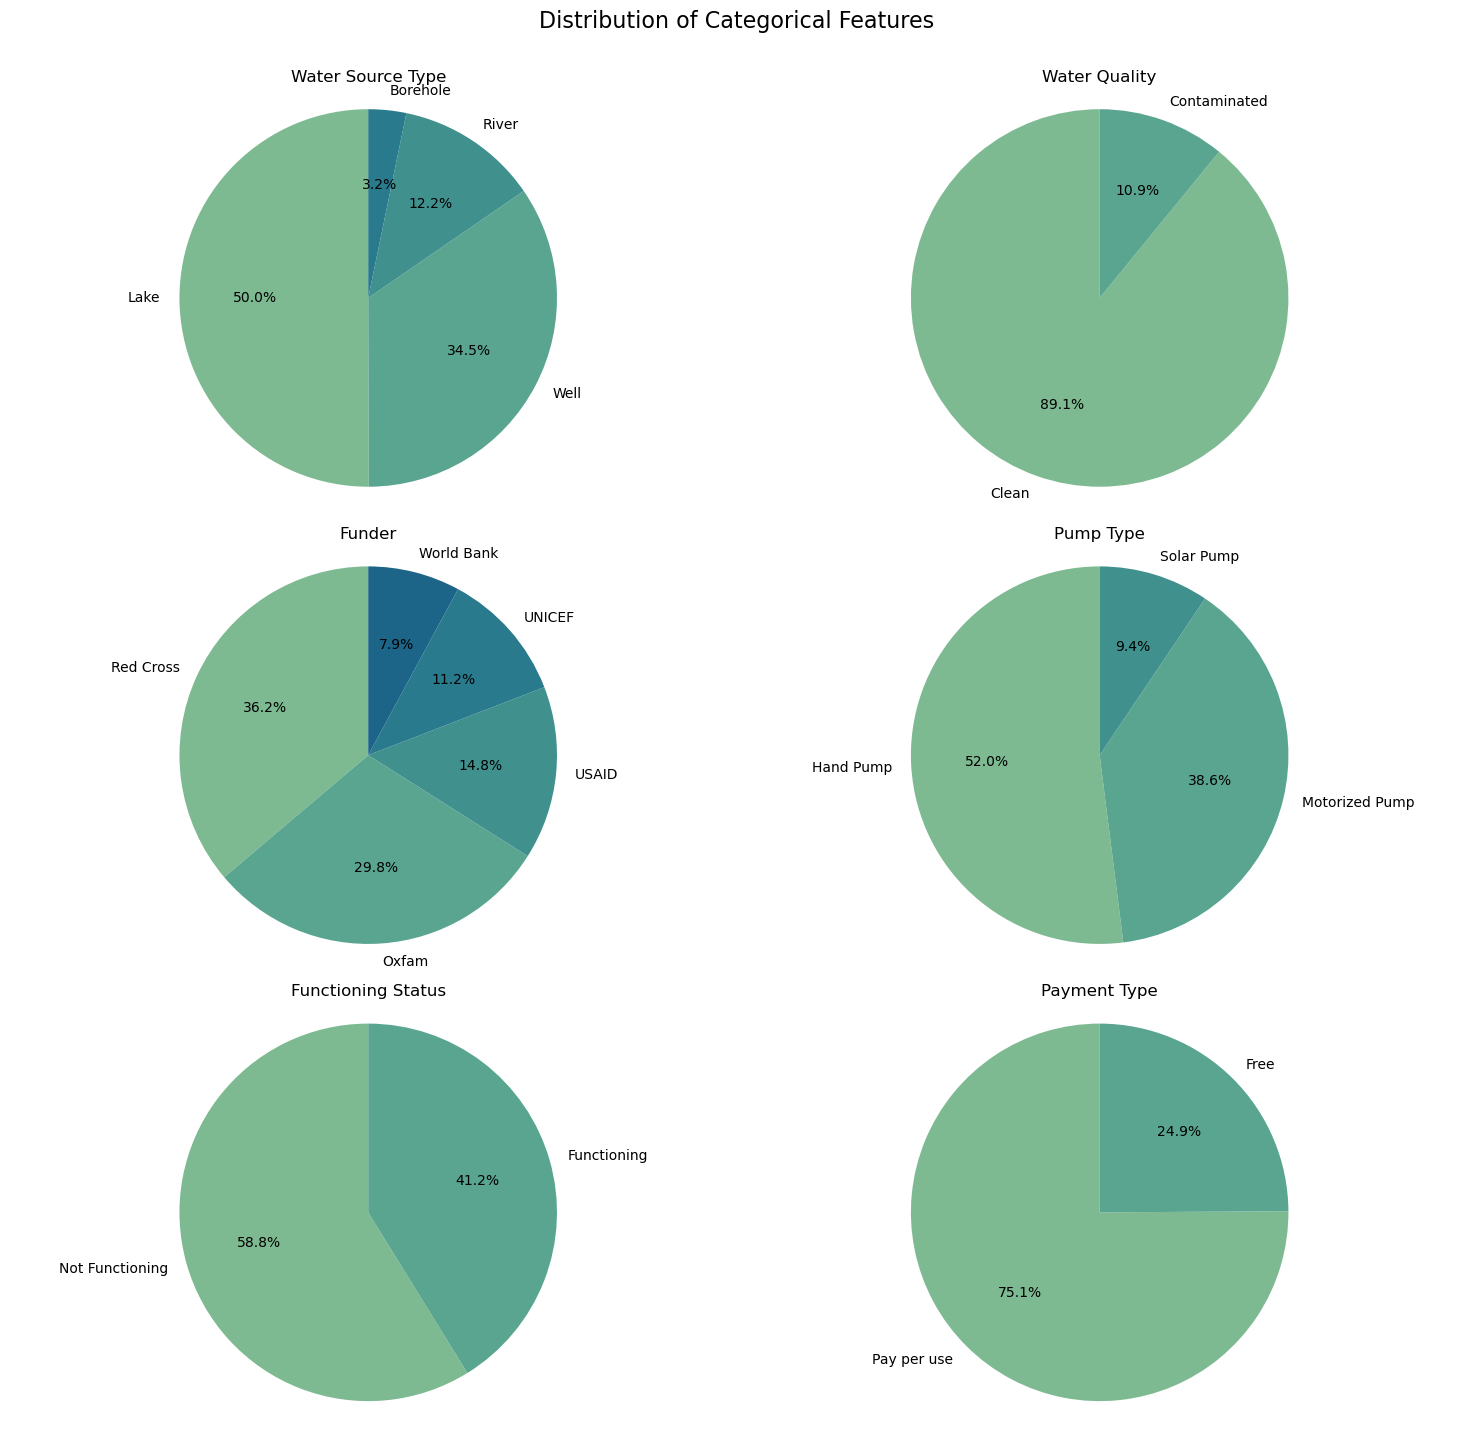

In [181]:
# Create subplots for pie charts
num_cols = 2
num_rows = (len(categorical_features) + num_cols - 1) // num_cols  # Calculate the number of rows needed
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))  # Adjust figsize for better spacing
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Define custom color palette (crest palette)
palette = sns.color_palette("crest", n_colors=6)  # Use 'crest' with 6 different hues

# Plot pie charts for each categorical feature
for i, column in enumerate(categorical_features):
    ax = axes[i]  # Get the axis for this subplot
    proportions = df[column].value_counts(normalize=True, dropna=True)
    
    # Use a color palette with distinct hues
    ax.pie(proportions, labels=proportions.index, autopct='%1.1f%%', startangle=90,
           colors=palette[:len(proportions)])  # Assign a color to each segment
    ax.set_title(column)  # Set the title
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Remove any unused subplots
for i in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to prevent overlap
plt.suptitle('Distribution of Categorical Features', fontsize=16)  # Add a suptitle for the entire figure
plt.show()  # Display the plot


In [182]:
# Proportional imputation function
def proportional_imputation(df, categorical_cols):
    """
    Imputes missing values in categorical columns of a DataFrame,
    preserving the original proportions of each category within the column.

    Args:
        df (pd.DataFrame): The DataFrame to impute.
        categorical_cols (list): A list of column names that are categorical.

    Returns:
        pd.DataFrame: The DataFrame with missing values imputed.
    """
    for col in categorical_cols:
        # Calculate the existing value counts and their proportions
        value_counts = df[col].value_counts(normalize=True)

        # Identify the missing values in the column
        missing_mask = df[col].isnull()
        num_missing = missing_mask.sum()

        # If there are no missing values, skip to the next column
        if num_missing == 0:
            continue

        # Randomly choose values to fill the missing spots based on the proportions
        imputed_values = np.random.choice(value_counts.index, size=num_missing, p=value_counts.values)

        # Fill the missing values with the randomly chosen values
        df.loc[missing_mask, col] = imputed_values

    return df  # Return the modified DataFrame

# List of categorical columns to apply proportional imputation
categorical_features = ['Water Source Type', 'Water Quality',
                         'Funder', 'Payment Type', 'Pump Type',
                         'Functioning Status']

# Apply proportional imputation directly to the original DataFrame
df = proportional_imputation(df, categorical_features)

# Check for missing values after imputation
print("Missing values after imputation:")
print(df.isnull().sum())  # Prints the number of missing values for each column



Missing values after imputation:
Water Pump ID               250
Water Source Type             0
Water Quality                 0
Distance to Nearest Town      0
Population Served             0
Installation Year             0
Funder                        0
Payment Type                  0
Water Pump Age                0
Pump Type                     0
GPS Coordinates             250
Functioning Status            0
dtype: int64


In [183]:
missing_values_df = pd.DataFrame({'Feature': df.columns, 'Missing Values': df.isnull().sum().values})
print(missing_values_df)

                     Feature  Missing Values
0              Water Pump ID             250
1          Water Source Type               0
2              Water Quality               0
3   Distance to Nearest Town               0
4          Population Served               0
5          Installation Year               0
6                     Funder               0
7               Payment Type               0
8             Water Pump Age               0
9                  Pump Type               0
10           GPS Coordinates             250
11        Functioning Status               0


In [184]:
print(df.isnull().values.any())  # Returns True if any missing values exist
print(df.isnull().sum().sum())  # Total number of missing values in the dataset

True
500


In [217]:
#Handling Outliers
# Calculate IQR for the 'Population Served' column
Q1 = df['Population Served'].quantile(0.25)
Q3 = df['Population Served'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers (values below lower_bound or above upper_bound)
outliers = df[(df['Population Served'] < lower_bound) | (df['Population Served'] > upper_bound)]

# Option 1: Remove outliers
df_no_outliers = df[~df['Population Served'].isin(outliers['Population Served'])]

# Option 2: Cap outliers (replace outliers with lower/upper bounds)
df['Population Served'] = df['Population Served'].clip(lower=lower_bound, upper=upper_bound)

# Print the result
print("Outliers removed:")
print(outliers)
print("\nData after handling outliers:")
print(df.head())

Outliers removed:
     Water Pump ID Water Source Type Water Quality  Distance to Nearest Town  \
351          WP352              Lake         Clean                      20.0   
1623        WP1624              Well         Clean                      37.0   
1761        WP1762              Lake         Clean                      50.0   
1782        WP1783              Well         Clean                      48.0   
2114        WP2115              Well         Clean                       6.0   
2391        WP2392              Well         Clean                      34.0   
2503        WP2504              Well         Clean                      35.0   
2706        WP2707              Lake         Clean                      44.0   
2932        WP2933              Lake         Clean                      45.0   
3072        WP3073              Well  Contaminated                      13.0   
3207        WP3208             River         Clean                      46.0   
3518        WP3519    

In [187]:
#Fixing inconsistencies: 
#Convert Installation Year to Integer
df['Installation Year'] = df['Installation Year'].astype(int)

#Fix GPS Coordinates (Split into Latitude & Longitude)
df[['Latitude', 'Longitude']] = df['GPS Coordinates'].str.extract(r'\((.*), (.*)\)').astype(float)

#Checking the dataset top rows again after correcting inconsistencies:
print(df.head())


  Water Pump ID Water Source Type Water Quality  Distance to Nearest Town  \
0         WP001              Well         Clean                      44.0   
1         WP002              Lake         Clean                      13.0   
2         WP003              Lake         Clean                      27.0   
3         WP004              Well         Clean                      14.0   
4         WP005              Lake         Clean                      41.0   

   Population Served  Installation Year      Funder Payment Type  \
0            13000.0               2006  World Bank         Free   
1            13000.0               1990   Red Cross         Free   
2            12000.0               1997       Oxfam  Pay per use   
3             9000.0               1992       Oxfam  Pay per use   
4            16000.0               2006  World Bank  Pay per use   

   Water Pump Age       Pump Type                            GPS Coordinates  \
0            18.0  Motorized Pump  (-20.59946306